In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

| Variable Name | Role    | Type        | Demographic      | Description                                                                                                                                                                                                                                      | Units | Missing Values |
|---------------|---------|-------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------|----------------|
| age           | Feature | Integer     | Age              |                                                                                                                                                                                                                                                  |        | no             |
| job           | Feature | Categorical | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                                  |        | no             |
| marital       | Feature | Categorical | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                                              |        | no             |
| education     | Feature | Categorical | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                                                  |        | no             |
| default       | Feature | Binary      |                  | has credit in default?                                                                                                                                                                                                                          |        | no             |
| balance       | Feature | Integer     |                  | average yearly balance                                                                                                                                                                                                                          | euros  | no             |
| housing       | Feature | Binary      |                  | has housing loan?                                                                                                                                                                                                                               |        | no             |
| loan          | Feature | Binary      |                  | has personal loan?                                                                                                                                                                                                                              |        | no             |
| contact       | Feature | Categorical |                  | contact communication type (categorical: 'cellular','telephone')                                                                                                                                                                               |        | yes            |
| day_of_week   | Feature | Date        |                  | last contact day of the week                                                                                                                                                                                                                    |        | no             |
| month         | Feature | Date        |                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                               |        | no             |
| duration      | Feature | Integer     |                  | last contact duration, in seconds (numeric). **Note**: this attribute highly affects the output target and should be used only for benchmarking, not real modeling.                                                                             |        | no             |
| campaign      | Feature | Integer     |                  | number of contacts performed during this campaign and for this client (includes last contact)                                                                                                                                                   |        | no             |
| pdays         | Feature | Integer     |                  | number of days since the client was last contacted from a previous campaign (-1 means not previously contacted)                                                                                                                                |        | yes            |
| previous      | Feature | Integer     |                  | number of contacts performed before this campaign and for this client                                                                                                                                                                           |        | no             |
| poutcome      | Feature | Categorical |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                     |        | yes            |
| y             | Target  | Binary      |                  | has the client subscribed a term deposit?                                                                                                                                                                                                       |        | no             |


In [3]:
df= pd.read_csv('dataset/bank-additional-full.csv', sep= ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


C:\Users\Hathim\AppData\Local\Temp\ipykernel_16888\2541682659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['y'], palette='Set2')


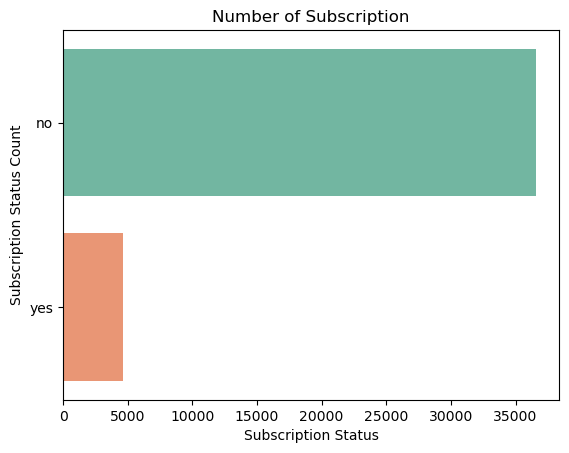

In [15]:
sns.countplot(df['y'], palette='Set2')
plt.title('Number of Subscription')
plt.xlabel('Subscription Status')
plt.ylabel('Subscription Status Count')
plt.show()

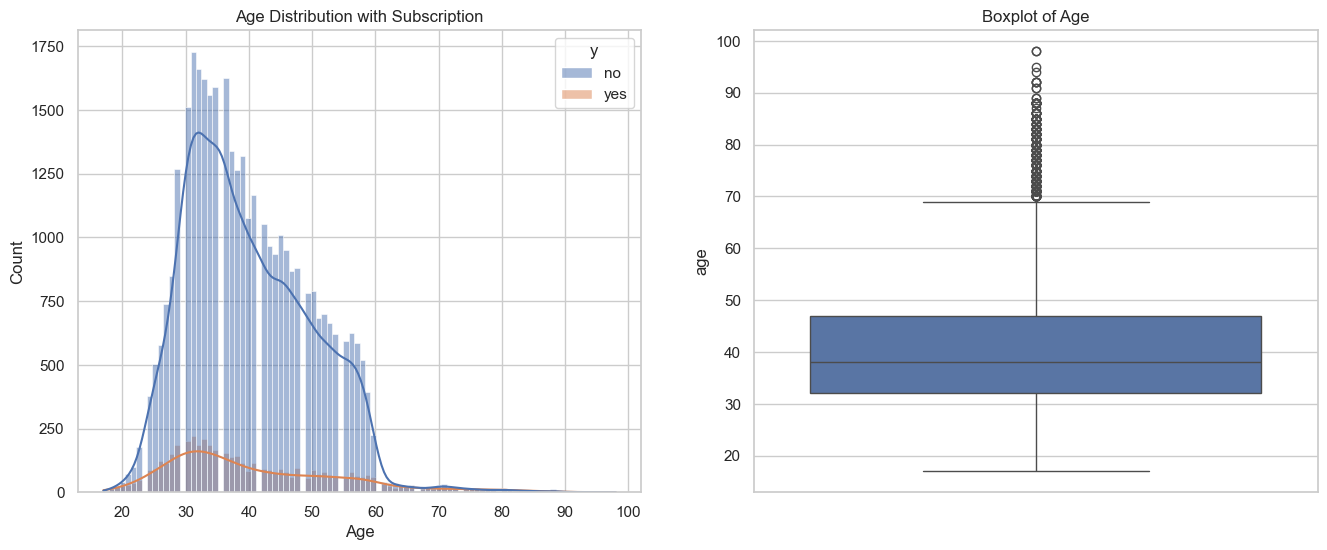

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='age', hue='y', kde=True, ax= axes[0])
axes[0].set_title('Age Distribution with Subscription')
axes[0].set_xlabel('Age')

sns.boxplot(data= df['age'], ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.show()

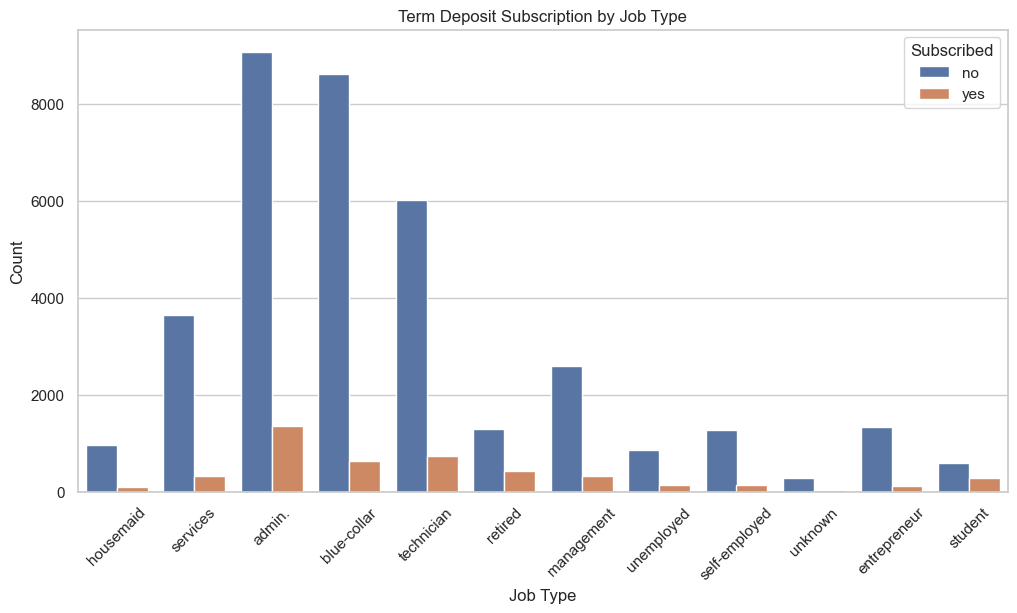

In [92]:
fig, ax= plt.subplots(figsize=(12,6))

sns.countplot(data=df, x='job', hue='y')
plt.title('Term Deposit Subscription by Job Type')
plt.xlabel('Job Type')
plt.xticks(rotation= 45)
plt.ylabel('Count')
plt.legend(title='Subscribed')

plt.show()

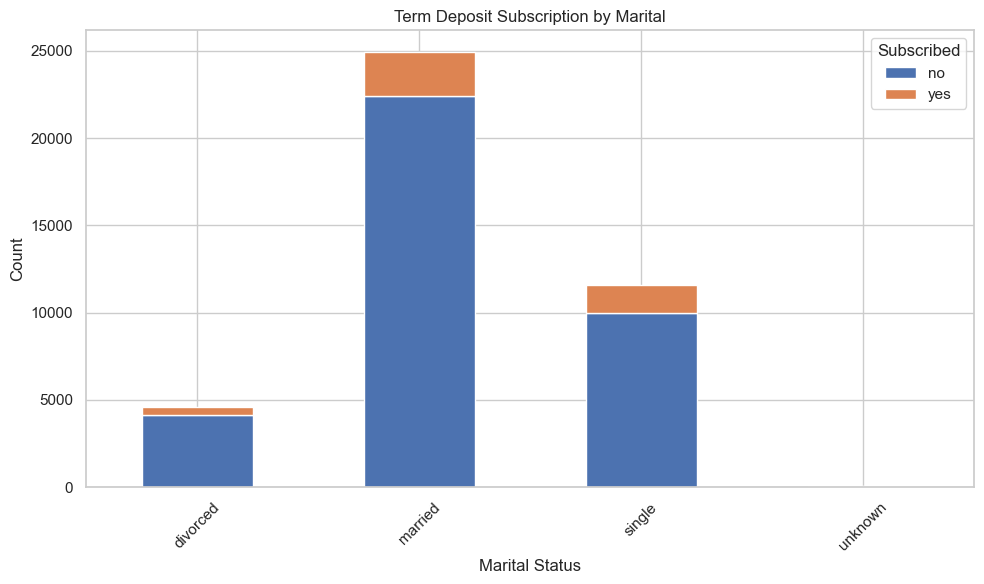

In [ ]:
counts = df.groupby(['marital', 'y']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Term Deposit Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `house` for `x`. An entry with this name does not appear in `data`.

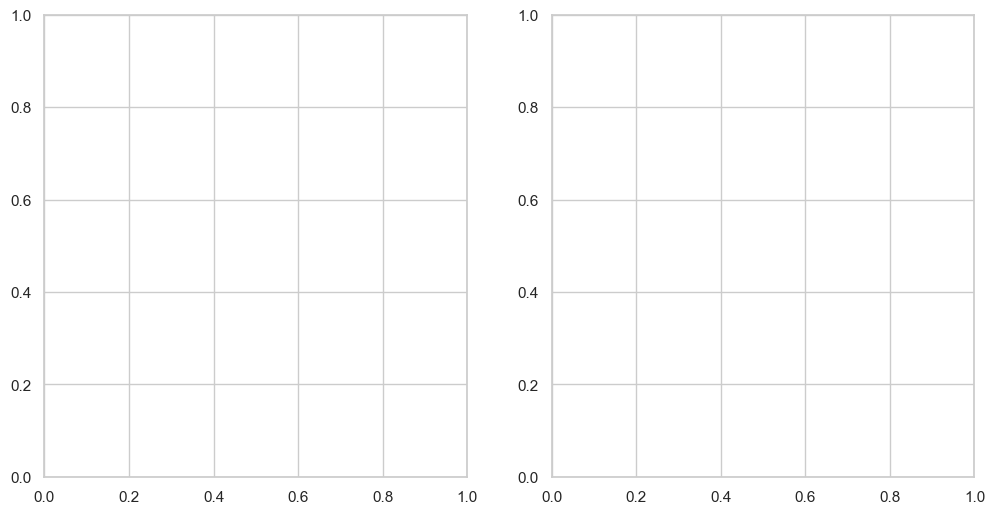

In [107]:
loan= df.groupby(['housing', 'loan'], as_index=False).count()

fig, axes= plt.subplots(1, 2, figsize=(12,6))

sns.barplot(data=loan, x='house', ax=axes[0])
plt.show()